In [4]:
pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.3 MB/s eta 0:00:00


In [5]:
import mglearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [6]:
url = "https://raw.githubusercontent.com/enricochandran/01.-Machine-Learning/refs/heads/main/02.%20Week%202/CitarumWater/CitarumWater.csv"
df = pd.read_csv(url)
df.head()

,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55°C,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55°C,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55°C,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55°C,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55°C,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,-,2.44,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             2500 non-null   int64  
 1   NamaSungai     2500 non-null   object 
 2   TitikPantau    2500 non-null   object 
 3   Waktu          2500 non-null   object 
 4   pH             2500 non-null   float64
 5   Temp           2500 non-null   object 
 6   TSS            2500 non-null   float64
 7   DO             2500 non-null   float64
 8   BOD            2500 non-null   float64
 9   COD            2500 non-null   float64
 10  Nitrat         2500 non-null   float64
 11  FecalColiform  2500 non-null   float64
 12  Fosfat         2500 non-null   float64
 13  O2             2500 non-null   object 
 14  IP             2500 non-null   float64
 15  Class          2500 non-null   int64  
dtypes: float64(9), int64(2), object(5)
memory usage: 312.6+ KB


In [15]:
df_clean = df.drop(columns=["No", "NamaSungai", "TitikPantau", "Waktu", "O2"])

df_clean["Temp"] = df_clean["Temp"].str.replace("°C", "").astype(float)

df_clean.head()

,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,IP,Class
0,7.57,25.55,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,5.12,3
1,7.69,25.55,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,5.91,3
2,7.39,25.55,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,7.76,3
3,7.49,25.55,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,9.61,3
4,7.17,25.55,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,2.44,2


In [16]:
print("Jumlah data kosong : ")
print(missing_values)

total_missing = missing_values.sum()
print("Total missing values:", total_missing)
print("Jumlah data duplikat : ",df.duplicated().sum())

Jumlah data kosong : 
pH               0
Temp             0
TSS              0
DO               0
BOD              0
COD              0
Nitrat           0
FecalColiform    0
Fosfat           0
IP               0
Class            0
dtype: int64
Total missing values: 0
Jumlah data duplikat :  0


In [18]:
X = df_clean.drop(columns=["Class"])
y = df_clean["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((2000, 10), (500, 10))

In [21]:
model = LogisticRegression(max_iter=1000, random_state=42)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled), multi_class="ovr")

print(f'Akurasi: {accuracy}')
print(f'Presisi: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'AUC: {auc}')


Akurasi: 0.97
Presisi: 0.9702017247974406
Recall: 0.97
F1-Score: 0.9697909877623853
AUC: 0.9982522953097512


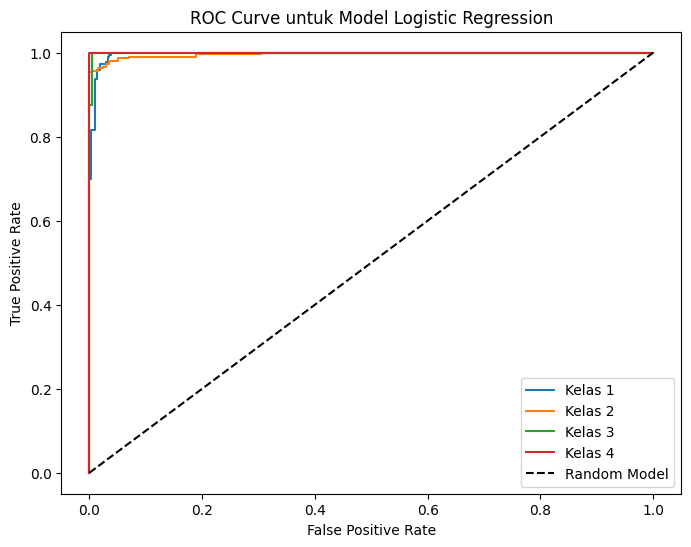

In [22]:
y_test_binarized = label_binarize(y_test, classes=model.classes_)
n_classes = y_test_binarized.shape[1]

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], model.predict_proba(X_test_scaled)[:, i])
    plt.plot(fpr, tpr, label=f'Kelas {model.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--', label="Random Model")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve untuk Model Logistic Regression")
plt.legend()
plt.show()

# **1. Accuracy (Akurasi)**
Accuracy mengukur seberapa sering model melakukan prediksi yang benar (baik benar positif maupun benar negatif) dibandingkan dengan total prediksi.

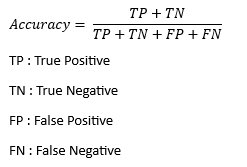

# **2. Precision (Presisi)**
Precision mengukur seberapa akurat model dalam memprediksi kelas positif. Ini adalah rasio prediksi benar positif (True Positives) terhadap semua prediksi positif (True Positives + False Positives).

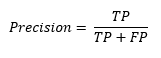

# **3. Recall (Sensitivity atau True Positive Rate)**
Recall mengukur seberapa baik model dapat mengidentifikasi semua instance positif. Ini adalah rasio prediksi benar positif (True Positives) terhadap semua instance positif yang sebenarnya (True Positives + False Negatives).

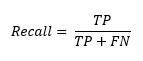

# **4. F1-Score**
F1-Score adalah harmonic mean dari Precision dan Recall. Ini memberikan keseimbangan antara Precision dan Recall.

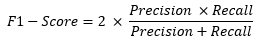

# **5. AUC-ROC (Area Under the Receiver Operating Characteristic Curve)**
AUC-ROC adalah metrik yang mengukur performa model klasifikasi dengan memplot True Positive Rate (TPR) terhadap False Positive Rate (FPR) pada berbagai threshold.

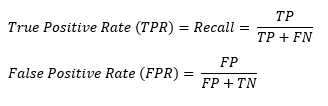

AUC adalah area di bawah kurva ROC. Nilainya berkisar antara 0 dan 1:
*   AUC = 1: Model sempurna.
*   AUC = 0.5: Model tidak lebih baik dari tebakan acak.
*   AUC < 0.5: Model performanya buruk.